In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import sys
import pandas as pd

sys.path.append('../../../param_search')
import param_search as ps

ps.set_verbose(False)
ps.set_backend('slurm')

In [3]:
base_dir = '2025-12-09_train' # one subject

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/one_subject.csv',
    output_func=['softplus', 'pow10'],
    output_scale=[1.0, 1000.],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid)

16

In [4]:
base_dir = '2025-12-16_train' # ten subjects

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_bias={output_bias} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/ten_subjects.csv',
    output_func=['pow10'],
    output_bias=[1.0, 3.0],
    output_scale=[1.0, 0.1],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid)

16

In [5]:
base_dir = '2025-01-05_train' # full dataset

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_bias={output_bias} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/subjects.csv',
    variant='2025-01-05',
    output_func=['pow10'],
    output_bias=[1.0, 3.0],
    output_scale=[1.0, 0.1],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 16

16

In [9]:
base_dir = '2026-01-27_train' # new config file, updated/fixed uniform + seeded material sampling, DICE score, etc. try bounds modes.

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.bounds_mode={bounds_mode} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    bounds_mode=['hard', 'soft', 'none'],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 12

12

In [268]:
base_dir = '2026-01-28_train' # try different input shifts, revert output shift/scale

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.output_shift={output_shift} \\
    --set training.model.output_scale={output_scale} \\
    --set training.model.input_shift={input_shift} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    output_mode='basic',
    output_shift=[3.0],
    output_scale=[0.1],
    input_shift=[0.0, 1.0],
    supervised=[True, False],
    rho_known=[True, False],
) + ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    output_mode='stats',
    output_shift=[3.4863],
    output_scale=[0.3271],
    input_shift=[0.0, 1.0],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 16

16

In [269]:
%autoreload
try:
    jobs = ps.setup(base_dir, template, name_format, grid, overwrite=False)
except OSError:
    jobs = ps.load(base_dir)

jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params_hash,params.config,params.subjects,params.variant,params.output_mode,params.output_shift,params.output_scale,params.input_shift,params.supervised,params.rho_known
0,9cc9f52f0b294478,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,9cc9f52f0b294478,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,0.0,True,True
1,ce6777cfc9981749,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,ce6777cfc9981749,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,0.0,True,False
2,35747de7e9868aed,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,35747de7e9868aed,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,0.0,False,True
3,3615bfa2e48b3ac1,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,3615bfa2e48b3ac1,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,0.0,False,False
4,d820be93c8704340,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,d820be93c8704340,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,1.0,True,True
5,2391ae8f4a8922a7,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2391ae8f4a8922a7,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,1.0,True,False
6,722a0d69702c1700,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,722a0d69702c1700,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,1.0,False,True
7,bb1b04a69c92f985,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,bb1b04a69c92f985,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,1.0,False,False
8,0f2fbc6ae49a0171,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,0f2fbc6ae49a0171,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,stats,3.4863,0.3271,0.0,True,True
9,a012bc64fc8402ce,NEW,0,<NA>,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,a012bc64fc8402ce,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,stats,3.4863,0.3271,0.0,True,False


In [24]:
%autoreload
jobs = ps.recover(jobs)
jobs = ps.status(jobs)
jobs = ps.history(jobs)
jobs.groupby(['job_state']).count()

,job_name,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,script_path,...,params.supervised,params.rho_known,output_exists,output_fsize,output_mtime,array_idx,last_live_at,state_source,finalized,finalized_at
job_state,,,,,,,,,,,,,,,,,,,,,
RUNNING,12,12,12,12,12,12,12,12,12,12,...,12,12,12,0,0,0,12,12,1,1


In [25]:
jobs = ps.collect(jobs)
jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.supervised,params.rho_known,output_exists,output_fsize,output_mtime,array_idx,last_live_at,state_source,finalized,finalized_at
0,a3cbd07fde7123bd,RUNNING,1,37172062,v009,8:58:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,False,<NA>,<NA>,NaN,2026-01-27T18:05:32,status,None,None
1,443534fc65e5874b,RUNNING,1,37172064,v010,8:58:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,False,<NA>,<NA>,NaN,2026-01-27T18:05:32,status,None,None
2,301af8469458be0a,RUNNING,2,37190292,v016,1:13:07,[Epoch 1 | Train batch 84/624] loss = 5.2742e-...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,True,False,<NA>,<NA>,NaN,2026-01-27T18:05:32,status,True,2026-01-27T15:43:50
3,4a1e7d3a299d4677,RUNNING,1,37172068,v008,8:58:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,False,False,<NA>,<NA>,NaN,2026-01-27T18:05:32,status,None,None
4,8f7cd406f7f9900b,RUNNING,1,37172070,v008,8:58:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,False,<NA>,<NA>,NaN,2026-01-27T18:05:32,status,None,None
5,ddd38410124e0b25,RUNNING,1,37172071,v016,8:54:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,False,<NA>,<NA>,NaN,2026-01-27T18:05:32,status,None,None
6,420fa294770f6c6a,RUNNING,1,37172073,v016,8:54:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,True,False,<NA>,<NA>,NaN,2026-01-27T18:05:32,status,None,None
7,0badab7ce2a59724,RUNNING,1,37172074,v002,8:54:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,False,False,False,<NA>,<NA>,NaN,2026-01-27T18:05:32,status,None,None
8,099f680c4b90ae80,RUNNING,1,37172077,v002,8:54:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,True,False,<NA>,<NA>,NaN,2026-01-27T18:05:32,status,None,None
9,f47a0b49441b4809,RUNNING,1,37172079,v002,8:54:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,True,False,False,<NA>,<NA>,NaN,2026-01-27T18:05:32,status,None,None


In [26]:
j = 0
jobs[jobs.job_state == 'FAILED'].iloc[j]

IndexError: single positional indexer is out-of-bounds

In [ ]:
j = 0
failed_jobs = jobs[jobs.job_state == 'FAILED']
print(failed_jobs.iloc[j])
print(failed_jobs.iloc[j].stderr)

In [270]:
#jobs.loc[jobs.job_state == 'FAILED', 'job_id'] = pd.NA
jobs = ps.submit(jobs)
jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params_hash,params.config,params.subjects,params.variant,params.output_mode,params.output_shift,params.output_scale,params.input_shift,params.supervised,params.rho_known
0,9cc9f52f0b294478,SUBMITTED,1,37202111,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,9cc9f52f0b294478,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,0.0,True,True
1,ce6777cfc9981749,SUBMITTED,1,37202112,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,ce6777cfc9981749,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,0.0,True,False
2,35747de7e9868aed,SUBMITTED,1,37202113,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,35747de7e9868aed,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,0.0,False,True
3,3615bfa2e48b3ac1,SUBMITTED,1,37202114,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,3615bfa2e48b3ac1,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,0.0,False,False
4,d820be93c8704340,SUBMITTED,1,37202115,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,d820be93c8704340,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,1.0,True,True
5,2391ae8f4a8922a7,SUBMITTED,1,37202116,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2391ae8f4a8922a7,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,1.0,True,False
6,722a0d69702c1700,SUBMITTED,1,37202117,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,722a0d69702c1700,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,1.0,False,True
7,bb1b04a69c92f985,SUBMITTED,1,37202118,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,bb1b04a69c92f985,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,basic,3.0000,0.1000,1.0,False,False
8,0f2fbc6ae49a0171,SUBMITTED,1,37202119,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,0f2fbc6ae49a0171,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,stats,3.4863,0.3271,0.0,True,True
9,a012bc64fc8402ce,SUBMITTED,1,37202120,<NA>,<NA>,<NA>,<NA>,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,a012bc64fc8402ce,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,stats,3.4863,0.3271,0.0,True,False


In [67]:
# load training jobs
jobs_t = ps.load('2026-01-27_train')
ex_df_t = ps.outputs(jobs_t,  output_name='outputs/example_metrics.csv')
mat_df_t = ps.outputs(jobs_t,  output_name='outputs/material_metrics.csv')

In [82]:
ex_df_t[
    ex_df_t['params.rho_known'] & 
    ~ex_df_t['params.supervised']
]

,epoch,phase,batch,step,loss,subject,num_voxels,E_vox.mean,E_vox.rms,E_vox.rmse,...,source_path,job_name,job_id,params_hash,params.config,params.subjects,params.variant,params.bounds_mode,params.supervised,params.rho_known
2548,0,val,0,0,0.363485,wss.bec1921aace45bdecbc6ff5546f4ec42,321866,3713.307297,3887.858056,2912.923072,...,/ocean/projects/asc170022p/mtragoza/lung-proje...,301af8469458be0a,37190292,301af8469458be0a,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,hard,False,True
2549,0,val,1,0,0.063861,wss.4e401dd3f80cc5398cb92d283b4ad690,142596,3715.590790,3879.972428,1903.427027,...,/ocean/projects/asc170022p/mtragoza/lung-proje...,301af8469458be0a,37190292,301af8469458be0a,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,hard,False,True
2550,0,val,2,0,1.143430,wss.c6b291c802020785b785a4ac4a0dbd73,890781,4154.616570,4376.930453,4442.823659,...,/ocean/projects/asc170022p/mtragoza/lung-proje...,301af8469458be0a,37190292,301af8469458be0a,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,hard,False,True
2551,0,val,3,0,0.022618,wss.e7d4265bf0ed3a6848b4d1bc26a0d699,347321,3368.474015,3438.271357,1498.991952,...,/ocean/projects/asc170022p/mtragoza/lung-proje...,301af8469458be0a,37190292,301af8469458be0a,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,hard,False,True
2552,0,val,4,0,5.261792,wss.107637b6bdf8129d4904d89e9169817b,278279,3676.793034,3815.700901,5400.503530,...,/ocean/projects/asc170022p/mtragoza/lung-proje...,301af8469458be0a,37190292,301af8469458be0a,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,hard,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12826,13,val,86,8112,0.026599,wss.8da4e9a1997d171619b63315806d4cb4,1171463,5360.303101,5369.819654,1712.191951,...,/ocean/projects/asc170022p/mtragoza/lung-proje...,64feb9bec6b10a53,37172081,64feb9bec6b10a53,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,none,False,True
12827,13,val,87,8112,0.546145,wss.b71a1783b18e9f48f907cfc53e440589,212554,5632.841192,5638.972302,3823.907330,...,/ocean/projects/asc170022p/mtragoza/lung-proje...,64feb9bec6b10a53,37172081,64feb9bec6b10a53,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,none,False,True
12828,13,val,88,8112,0.524865,wss.66dfcafd1ca29817de1afe4c8aa3dcce,364471,5266.284364,5276.819748,4049.318424,...,/ocean/projects/asc170022p/mtragoza/lung-proje...,64feb9bec6b10a53,37172081,64feb9bec6b10a53,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,none,False,True
12829,13,val,89,8112,0.253869,wss.9e997b501e1a43d7d810b14a81e12eca,203107,5651.243344,5655.579259,2088.077981,...,/ocean/projects/asc170022p/mtragoza/lung-proje...,64feb9bec6b10a53,37172081,64feb9bec6b10a53,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,2026-01-15,none,False,True


In [187]:
sys.path.append('../..')
import project.visual.matplotlib as mpl_viz
import matplotlib.pyplot as plt
import seaborn as sns

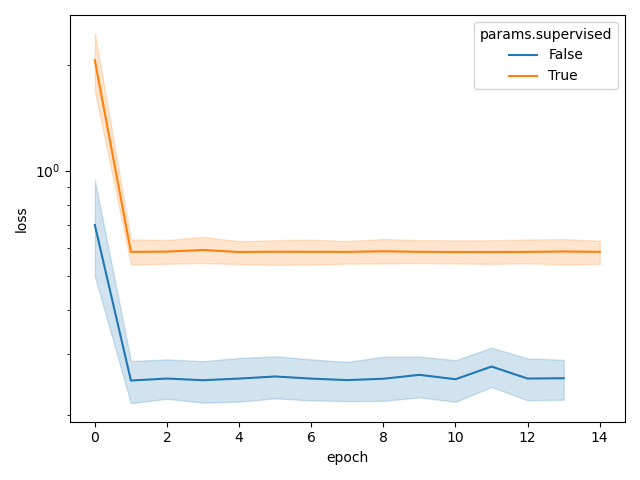

In [85]:
fig, ax = plt.subplots()

sns.lineplot(
    ex_df_t[
        ex_df_t['params.rho_known'] & 
        (ex_df_t['params.bounds_mode'] == 'none')
    ],
    x='epoch',
    y='loss',
    hue='params.supervised',
    ax=ax
)
ax.set_yscale('log')
fig.tight_layout()

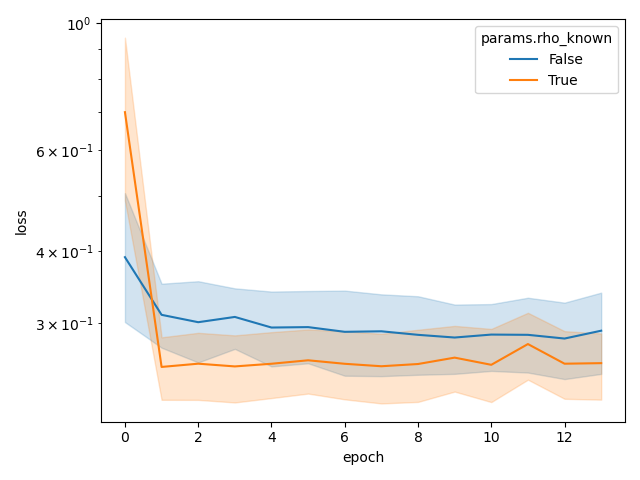

In [86]:
fig, ax = plt.subplots()

sns.lineplot(
    ex_df_t[
        ~ex_df_t['params.supervised'] & 
        (ex_df_t['params.bounds_mode'] == 'none')
    ],
    x='epoch',
    y='loss',
    hue='params.rho_known',
    ax=ax
)
ax.set_yscale('log')
fig.tight_layout()

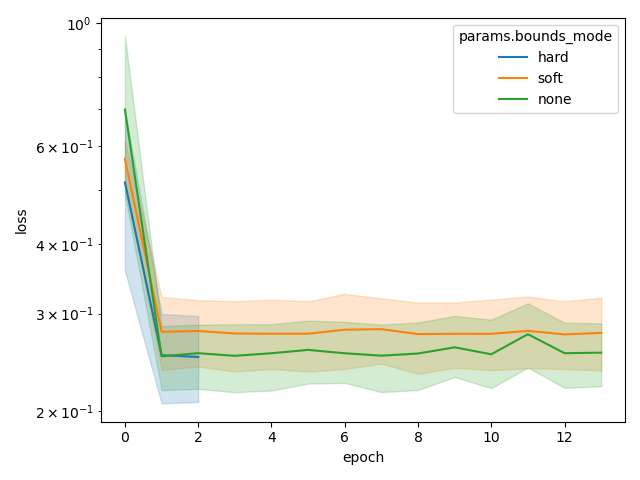

In [81]:
fig, ax = plt.subplots()

sns.lineplot(
    ex_df_t[
        ex_df_t['params.rho_known'] & 
        ~ex_df_t['params.supervised']
    ],
    x='epoch',
    y='loss',
    hue='params.bounds_mode',
    ax=ax
)
ax.set_yscale('log')
fig.tight_layout()

In [174]:
# load optimization baseline
jobs_o = ps.load('2026-01-26_optimize')
ex_df_o = ps.outputs(jobs_o,  output_name='outputs/example_metrics.csv')
mat_df_o = ps.outputs(jobs_o,  output_name='outputs/material_metrics.csv')

In [175]:
def parse_subjects(path, prefix):
    import ast
    with open(path) as f:
        for line in f:
            if line.startswith(prefix):
                part = line[len(prefix):].strip()
                return ast.literal_eval(part)

test_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Test subjects:')
test_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Test subjects:')
print(len(test_set1), len(test_set2), test_set1 == test_set2)

val_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Val subjects:')
val_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Val subjects:')
print(len(val_set1), len(val_set2), val_set1 == val_set2)

train_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Train subjects:')
train_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Train subjects:')
print(len(train_set1), len(train_set2), train_set1 == train_set2)


195 195 True
91 91 False
624 624 False


In [176]:
import project

config = project.core.fileio.load_config('2026-01-15_config.yaml')
config['dataset']['examples']['subjects'] = \
    '/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv'

examples = project.api.get_examples(config['dataset'])

bad_set = set()
for ex in examples:
    if all(c.startswith('_') for c in ex.metadata['category']):
        bad_set.add(ex.subject)

len(bad_set)

35

In [178]:
%autoreload
ex_df = pd.concat([
    ex_df_t[ex_df_t.epoch == 10],
    ex_df_o[~ex_df_o['params.subject'].isin(test_set1) & ~ex_df_o['params.subject'].isin(bad_set)]
])
ex_df['params.supervised'] = ex_df['params.supervised'].astype(bool)

ex_df['method'] = 'unknown'
ex_df.loc[(ex_df.phase == 'optimize'), 'method'] = 'FEM-opt'
ex_df.loc[(ex_df.phase != 'optimize') & ex_df['params.supervised'], 'method'] = 'sup-DL'
ex_df.loc[(ex_df.phase != 'optimize') & ~ex_df['params.supervised'], 'method'] = 'FEM-DL'
ex_df['method'].unique()

array(['sup-DL', 'FEM-DL', 'FEM-opt'], dtype=object)

In [181]:
ex_df.groupby(['method', 'params.rho_known']).describe()

epoch                                           \
                          count  mean  std   min   25%   50%   75%   max   
method  params.rho_known                                                   
FEM-DL  False             273.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   
        True              182.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   
FEM-opt False             715.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
        True              715.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
sup-DL  False             273.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   
        True              273.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   

                          batch        ... res_cell.mean            \
                          count  mean  ...           75%       max   
method  params.rho_known               ...                           
FEM-DL  False             273.0  45.0  ...      1.114601  4.415341   
        True              182.0  45.0  ...      1.459546  6.519002   
FEM-opt False             715.0   0.0  ...      1.095020  8.071400   
        True              715.0   0.0  ...      1.223035  8.692553   
sup-DL  False             273.0  45.0  ...      1.146196  7.796358   
        True              273.0  45.0  ...      1.173483  8.972552   

                         res_cell.rms                                          \
                                count      mean       std       min       25%   
method  params.rho_known                                                        
FEM-DL  False                   273.0  1.131292  1.515323  0.000173  0.028481   
        True                    182.0  1.470011  1.815410  0.000634  0.046571   
FEM-opt False                   715.0  1.268497  1.843302  0.000174  0.039129   
        True                    715.0  1.372235  1.943851  0.000254  0.038828   
sup-DL  False                   273.0  1.249547  1.835688  0.000620  0.040863   
        True                    273.0  1.414934  2.022242  0.000254  0.061197   

                                                         
                               50%       75%        max  
method  params.rho_known                                 
FEM-DL  False             0.261938  1.944042   7.264775  
        True              0.517634  2.497103   9.190719  
FEM-opt False             0.355110  2.073883  17.282823  
        True              0.356974  2.296829  14.445896  
sup-DL  False             0.366686  2.072812  11.650196  
        True              0.431180  2.017711  13.348503  

[6 rows x 296 columns]

<Axes: xlabel='Count', ylabel='E_cell.nrmse'>

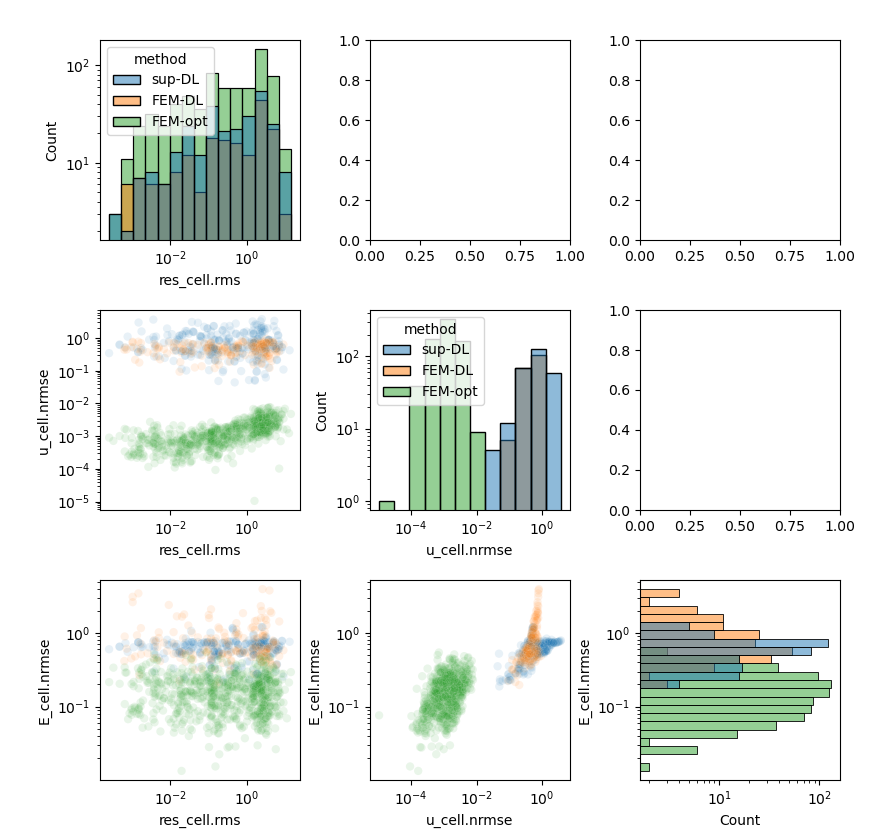

In [188]:
fig, axes = mpl_viz.subplot_grid(3, 3, ax_height=2, ax_width=2, padding=(1.0, 0.4, 0.6, 0.4), spacing=0.7) # lrbt

df = ex_df[ex_df['params.rho_known']]
hue = 'method'

ax = axes[0,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, x='res_cell.rms', hue=hue, legend=True, ax=ax)

ax = axes[1,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='res_cell.rms', y='u_cell.nrmse', hue=hue, legend=False, ax=ax, alpha=0.1)

ax = axes[2,0]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='res_cell.rms', y='E_cell.nrmse', hue=hue, legend=False, ax=ax, alpha=0.1)

ax = axes[1,1]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, x='u_cell.nrmse', hue=hue, legend=True, ax=ax)

ax = axes[2,1]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.scatterplot(df, x='u_cell.nrmse', y='E_cell.nrmse', hue=hue, legend=False, ax=ax, alpha=0.1)

ax = axes[2,2]
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
sns.histplot(df, y='E_cell.nrmse', hue=hue, legend=False, ax=ax)


/var/tmp/ipykernel_88653/320383162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)
/var/tmp/ipykernel_88653/320383162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)
/var/tmp/ipykernel_88653/320383162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

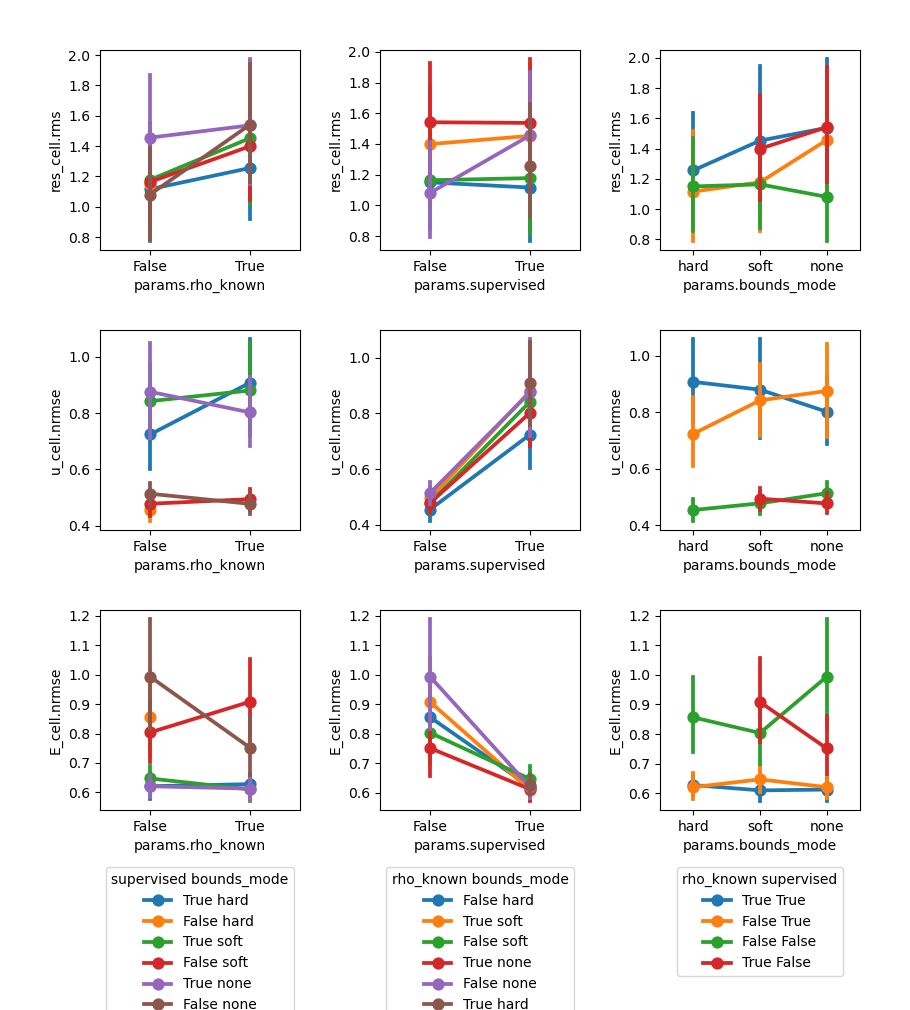

In [193]:
def add_group_column(df, cols, sep=' '):
    new_col = sep.join(cols)
    df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)
    return new_col

def plot(df, x, y):
    xs = x if isinstance(x, list) else [x]
    ys = y if isinstance(y, list) else [y]
    n_cols = len(xs)
    n_rows = len(ys)
    fig, axes = mpl_viz.subplot_grid(
        n_rows, n_cols,
        ax_height=2,
        ax_width=2,
        padding=[1.0, 0.5, 2.0, 0.5], 
        spacing=[0.8, 0.8]
    )
    for i, x in enumerate(xs):
        hue = add_group_column(df, [c for c in xs if c != x])
        for j, y in enumerate(ys):
            ax = axes[j,i]
            sns.pointplot(df, x=x, y=y, hue=hue, ax=ax, legend=True)
            ax.get_legend().remove()
            if j + 1 == n_rows:
                handles, labels = ax.get_legend_handles_labels()
                title = hue.replace('params.', '')
                ax.legend(handles, labels, loc='upper center', bbox_to_anchor=[0.5, -0.25], title=title)

plot(
    ex_df[ex_df.method != 'FEM-opt'],
    x=['params.rho_known', 'params.supervised', 'params.bounds_mode'],
    y=['res_cell.rms', 'u_cell.nrmse', 'E_cell.nrmse']
)

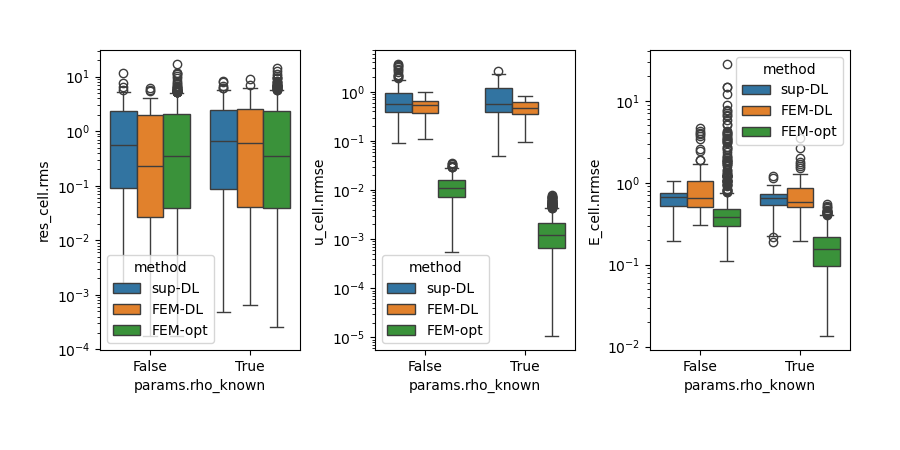

In [216]:
fig, axes = mpl_viz.subplot_grid(
    1, 3,
    ax_height=3,
    ax_width=2,
    padding=[1.0, 0.5, 1.0, 0.5], 
    spacing=[0.75, 0.75]
)

for i, y_col in enumerate(['res_cell.rms', 'u_cell.nrmse', 'E_cell.nrmse']):
    sns.boxplot(
        ex_df[
            (ex_df['params.bounds_mode'].fillna('none') == 'none')
        ],
        hue='method',
        x='params.rho_known',
        y=y_col,
        ax=axes[0,i]
    )

for ax in axes.flatten():
    ax.set_yscale('log')
    #ax.set_ylim(0.01, 10.0)
    #ax.legend(loc='upper left', title='params.supervised')

In [211]:
%autoreload
mat_df = pd.concat([
    mat_df_t[mat_df_t.epoch == 10],
    mat_df_o[~mat_df_o['params.subject'].isin(test_set1 | bad_set)]
])
mat_df['params.supervised'] = mat_df['params.supervised'].astype(bool)
mat_df['params.bounds_mode'] = mat_df['params.bounds_mode'].fillna('none')

mat_df['method'] = 'unknown'
mat_df.loc[(mat_df.phase == 'optimize'), 'method'] = 'FEM-opt'
mat_df.loc[(mat_df.phase != 'optimize') &  mat_df['params.supervised'], 'method'] = 'sup-DL'
mat_df.loc[(mat_df.phase != 'optimize') & ~mat_df['params.supervised'], 'method'] = 'FEM-DL'
mat_df['method'].unique()

array(['sup-DL', 'FEM-DL', 'FEM-opt'], dtype=object)

<Axes: xlabel='material', ylabel='mat_vox.dice'>

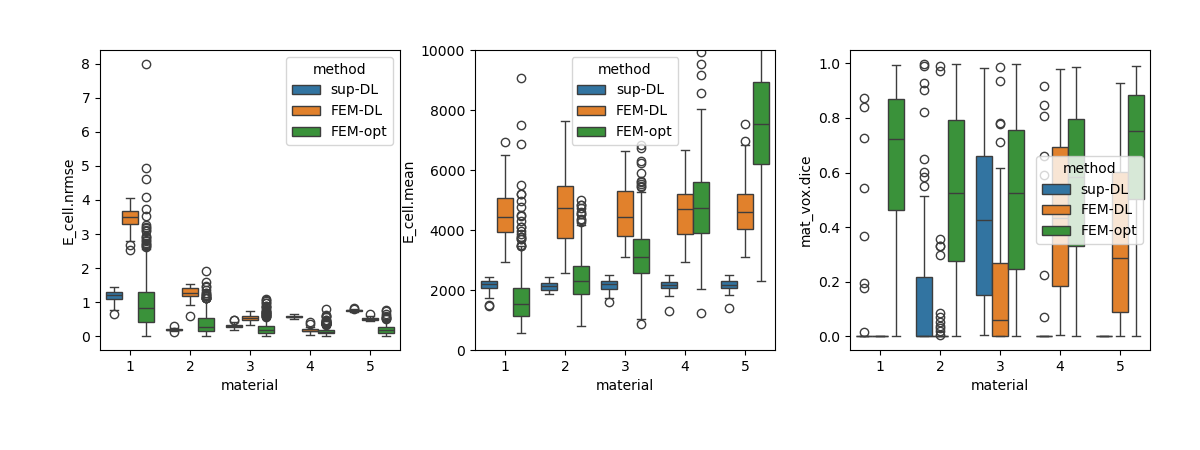

In [238]:
fig, axes = mpl_viz.subplot_grid(
    1, 3,
    ax_height=3,
    ax_width=3,
    padding=[1.0, 0.5, 1.0, 0.5], 
    spacing=[0.75, 0.75]
)

sns.boxplot(
    mat_df[
        (mat_df['params.rho_known']) &
        (mat_df['params.bounds_mode'].fillna('none') == 'none')
    ],
    hue='method',
    x='material',
    y='E_cell.nrmse',
    ax=axes[0,0]
)
sns.boxplot(
    mat_df[
        (~mat_df['params.rho_known']) &
        (mat_df['params.bounds_mode'].fillna('none') == 'none')
    ],
    hue='method',
    x='material',
    y='E_cell.mean',
    ax=axes[0,1]
)
axes[0,1].set_ylim(0, 10000)

sns.boxplot(
    mat_df[
        (~mat_df['params.rho_known']) &
        (mat_df['params.bounds_mode'].fillna('none') == 'none')
    ],
    hue='method',
    x='material',
    y='mat_vox.dice',
    ax=axes[0,2]
)

In [241]:
mat_df[
    mat_df['params.rho_known'] &
    (mat_df['params.bounds_mode'] == 'none')
].groupby(['method', 'material']).count()

epoch  phase  batch  step  loss  subject  num_voxels  \
method  material                                                         
FEM-DL  1            55     55     55    55    55       55          55   
        2            57     57     57    57    57       57          57   
        3            54     54     54    54    54       54          54   
        4            56     56     56    56    56       56          56   
        5            57     57     57    57    57       57          57   
FEM-opt 1           439    439    439   439   439      439         439   
        2           435    435    435   435   435      435         435   
        3           425    425    425   425   425      425         425   
        4           413    413    413   413   413      413         413   
        5           436    436    436   436   436      436         436   
sup-DL  1            60     60     60    60    60       60          60   
        2            59     59     59    59    59       59          59   
        3            55     55     55    55    55       55          55   
        4            54     54     54    54    54       54          54   
        5            51     51     51    51    51       51          51   

                  E_vox.mean  E_vox.rms  E_vox.rmse  ...  job_name  job_id  \
method  material                                     ...                     
FEM-DL  1                 55         55          55  ...        55      55   
        2                 57         57          57  ...        57      57   
        3                 54         54          54  ...        54      54   
        4                 56         56          56  ...        56      56   
        5                 57         57          57  ...        57      57   
FEM-opt 1                439        439         439  ...       439     439   
        2                435        435         435  ...       435     435   
        3                425        425         425  ...       425     425   
        4                413        413         413  ...       413     413   
        5                436        436         436  ...       436     436   
sup-DL  1                 60         60          60  ...        60      60   
        2                 59         59          59  ...        59      59   
        3                 55         55          55  ...        55      55   
        4                 54         54          54  ...        54      54   
        5                 51         51          51  ...        51      51   

                  params_hash  params.config  params.subjects  params.variant  \
method  material                                                                
FEM-DL  1                  55             55               55              55   
        2                  57             57               57              57   
        3                  54             54               54              54   
        4                  56             56               56              56   
        5                  57             57               57              57   
FEM-opt 1                 439            439                0             439   
        2                 435            435                0             435   
        3                 425            425                0             425   
        4                 413            413                0             413   
        5                 436            436                0             436   
sup-DL  1                  60             60               60              60   
        2                  59             59               59              59   
        3                  55             55               55              55   
        4                  54             54               54              54   
        5                  51             51               51              51   

                  params.bounds_mode  params.supervise

In [242]:
from IPython.display import Image

In [257]:
job_name = jobs_t[
    ~jobs_t['params.rho_known'] &
    jobs_t['params.supervised'] &
    (jobs_t['params.bounds_mode'] == 'none')
].iloc[0].job_name
job_name

'f47a0b49441b4809'

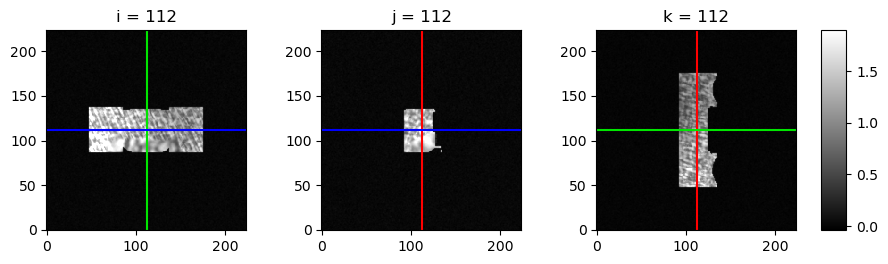

In [258]:
Image(filename=f'{base_dir}/{job_name}/outputs/image_viewer.png')

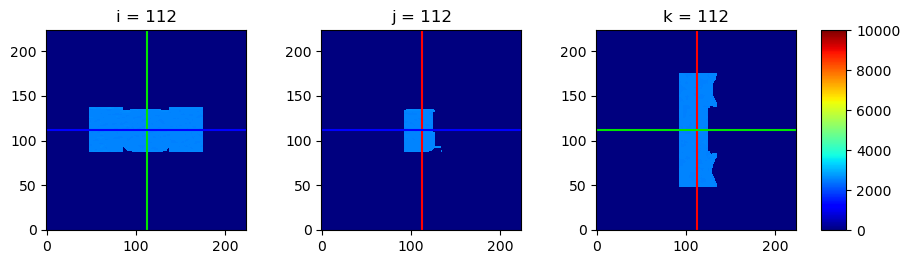

In [259]:
Image(filename=f'{base_dir}/{job_name}/outputs/E_pred_viewer.png')

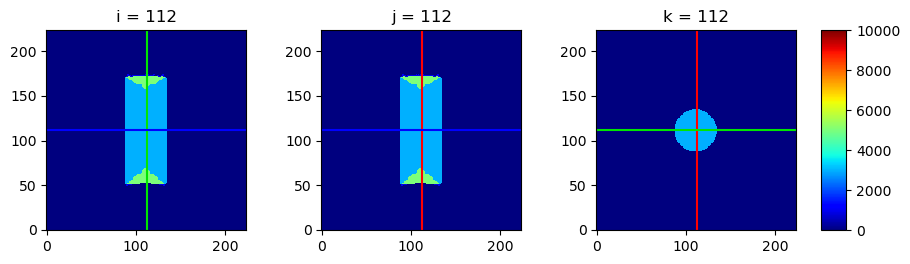

In [256]:
Image(filename=f'{base_dir}/{job_name}/outputs/E_true_viewer.png')

/var/tmp/ipykernel_82813/916136722.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  job_name = df.set_index(param_cols).loc[True, False, 3.0, 1.0].job_name.iloc[0]


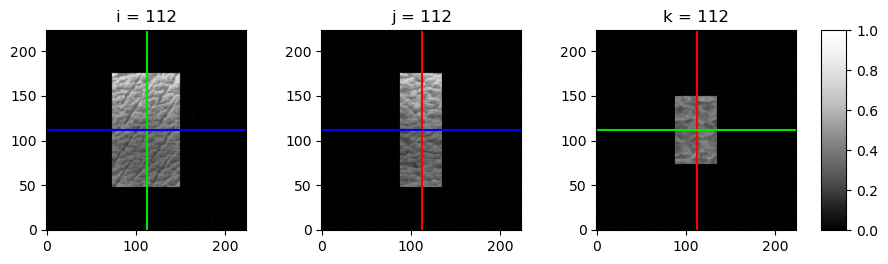

In [53]:
job_name = df.set_index(param_cols).loc[True, False, 3.0, 1.0].job_name.iloc[0]
Image(filename=f'{base_dir}/{job_name}/outputs/image_viewer.png')

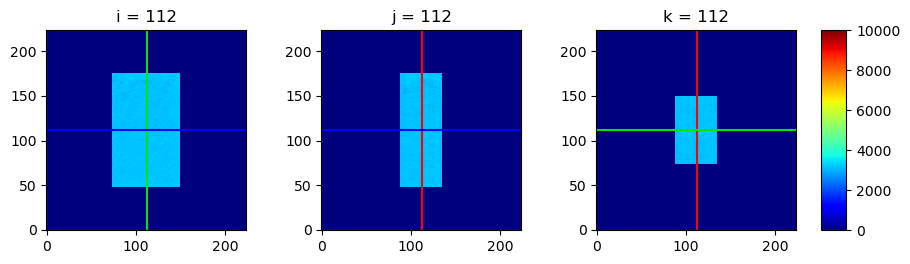

In [54]:
Image(filename=f'{base_dir}/{job_name}/outputs/E_pred_viewer.png')

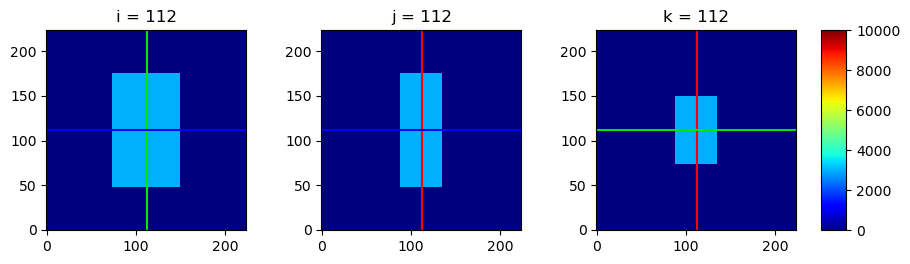

In [55]:
Image(filename=f'{base_dir}/{job_name}/outputs/E_true_viewer.png')